<a href="https://colab.research.google.com/github/rafaeldjsm/Engenharia/blob/main/Curvas_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELOS DE CURVA DE AGREGAÇÃO DE CUSTOS DE OBRA**






**Utilizando o Trapézio de custos**

> *O trapézio de custos é uma suposição teórica de que os custos seguem uma distribuição em forma de trapézio ao longo do tempo.<br> Essa curva de agregação clássica, desenvolvida a partir da ideia do trapézio é composta de três diferentes fases, sendo a primeira chamada de fase de mobilização, onde o consumo de recursos aumenta linearmente e que seria equivalente a 1/3 do período total da obra. A segunda fase é a que representa a ideia principal dessa curva, que é manter o consumo dos recursos em um patamar estável e tem a duração de metade da obra. Na terceira e última fase ocorre a chamada fase de desmobilização para encerrar a obra, onde os recursos decrescem também linearmente durante cerca de 1/6 do período total. Shtub et all (1994)*




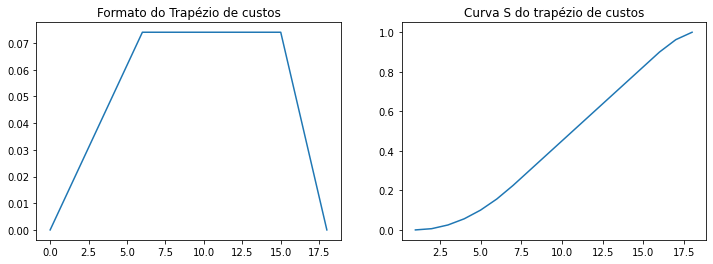

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#@title ## Entrada dos Parâmetros
#@markdown ---
#@markdown ### Duração total da Obra em meses:
n = 18 #@param {type:"number"}

# Altura do patamar de custos X
pat = (4/3)/n

# Função do trapézio
def ft(t,n):
    '''
    Função que define o trapézio de custos
    '''
    # Altura do patamar de custos X
    pat = (4/3)/n

    if t <= n / 3:
        y = 3*pat*t / n

    elif (t > n / 3) and (t <= 5* n / 6):
        y = pat
    else:
        y = 6*pat*(n-t)/n

    return y

ft2 = np.vectorize(ft)
x = np.arange(n+1)
y = ft2(x,18)

# Curva acumulada do trapézio (integral simplificada)
# Integral de Riemann
def ftac(t,y):
    if t == 0:
        return 0
    else:
        return (y[0] + 2 * sum( y[1:t-1]) + y[t-1] )/2

yac = [ftac(t,y) for t in x]

# Garantindo que o acumulado total seja 100%
acf0 = yac[-1]
yac2 = [t/acf0 for t in yac]

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, y)
ax1.set_title('Formato do Trapézio de custos')

ax2.plot(x[1:], yac2[1:])
ax2.set_title('Curva S do trapézio de custos')
plt.show()

**Utilizando o Curva Normal Acumulada**

> *O nível de atividade de um projeto típico assemelha-se a uma distribuição normal, ou seja, uma curva de Gauss.O trabalho executado geralmente começa em ritmo lento, com poucas atividades simultâneas; passa progressivamente a um ritmo mais intenso, com várias atividades ocorrendo paralelamente; e, quando o projeto se aproxima do fim, a quantidade de trabalho começa a decrescer. Esse mesmo aspecto lento-rápido-lento é verificado com o custo ao longo do andamento da obra. (MATTOS,2010)*




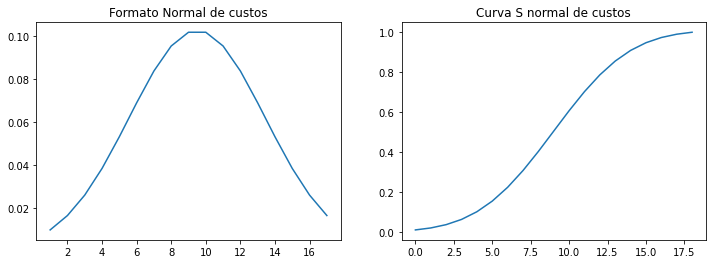

In [2]:
#@title CURVA NORMAL

from scipy.stats import norm

ynac = [norm.cdf((2*2.3*t/n)-2.3) for t in x]
# Garantindo que o acumulado total seja 100%
acfn = ynac[-1]
ynac2 = [t/acfn for t in ynac]


yn = [ynac2[t] - ynac2[t-1]  for t in x[:-1]]

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x[1:-1], yn[1:])
ax1.set_title('Formato Normal de custos')

ax2.plot(x, ynac2)
ax2.set_title('Curva S normal de custos')
plt.show()


**Utilizando o Curva S padrão Teórica**

> *Na falta de dados reais de projetos similares, ou quando o planejamento ainda é preliminar, é sempre interessante gerar uma curva S padrão {ou teórica) para fins de estimativa de avanço. Chamamos de curva S padrão aquela proveniente de uma equação matemática, correspondendo a um comportamento ideal.(MATTOS,2010)*

$$ \text{%Acum}(n)=1– \left[ 1-(\frac{n}{N})^{log(I)} \right] ^S $$

Sendo: <br>
%acum(n)=avanço acumulado (em %) até o período n;<br>
n= Número de ordem do período;<br>
N= prazo(número total de períodos);<br>
I= Ponto de Inflexão (mudança de concavidade da curva)<br>
S= Coeficiente de forma(depende do ritmo e da particularidade da obra, S geralmente em torno de 2).<br>

Obs: Na equação geral I deve ser considerado como número inteiro(I=60% deve ser 60 e não 0,6)

Para alguns valores de I e de S podem ocorrer distorções no comportamento da curva, o que leva o planejador a restringir o espectro ideal de trabalho (LARA, 1996), conforme mostra a Tabela abaixo:

| S\I  | 30 | 40 |  50 | 60 | 70 | 
|--------:| ------: | ------: |   ------: | ------: | ------: |
|1.1|X |  X|  OK | A  |  A |
|1.5|X |<font color='blue'>**A**|<font color='blue'>**OK**|<font color='blue'>**A**|  A |
|2  |A |<font color='blue'>**OK**|<font color='blue'> **OK**|<font color='blue'>**OK**| OK |
|2.5|OK|<font color='blue'>**OK**|<font color='blue'>**OK**| <font color='blue'>**OK**| OK |
|3  |A |  A|  OK | OK | OK |
|3.3|A |  A|  A  | OK |  A |

Legenda:
OK: Valores precisos <br>
A : Valores aproximados<br>
X : Valores dislorcidos<br>
I de 40 a 60 e S de 1,5 a 2,5 são os ranges dos valores mais usados ,marcados em azul<br>

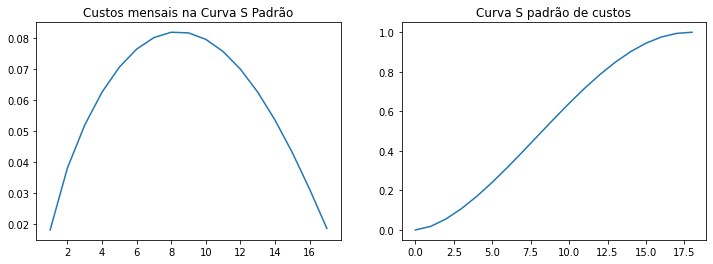

In [3]:
#@title ## Entrada dos Parâmetros
#@markdown ---
#@markdown ### Ponto de Inflexão (mudança de concavidade da curva):
I = 45 #@param {type:"number"}

#@markdown ### Coeficiente de forma:
S = 2.15 #@param spr {type:"raw"}


# Função do trapézio
def spad(t, n, I=50, S=2):
    '''
    Função que define a curva S padrão
    '''
    return 1 - (1-(t/n)**(np.log10(I)))**S

spad2 = np.vectorize(spad)

ysp = spad(x, 18, I, S)

# Curva dos custos
yspd = [ysp[t] - ysp[t-1]  for t in x[:-1]]

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x[1:-1], yspd[1:])
ax1.set_title('Custos mensais na Curva S Padrão')

ax2.plot(x, ysp)
ax2.set_title('Curva S padrão de custos')
plt.show()

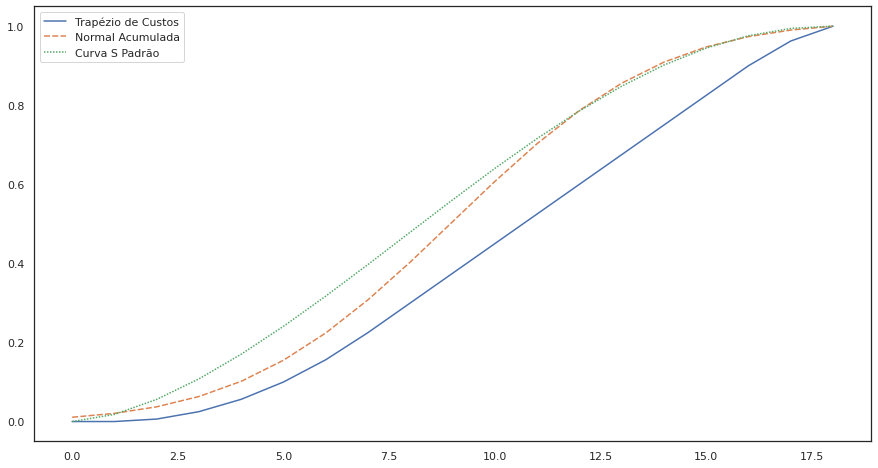

In [4]:
#@title COMPARAÇÃO ENTRE OS MÉTODOS DE AGREGAÇÃO

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)}, style = 'white')
data1 = {"Trapézio de Custos":yac2,"Normal Acumulada": ynac2,"Curva S Padrão": ysp}

sns.lineplot(data = data1);


REFERÊNCIAS:

SHTUB, A.; BARD, J.F. e Globerson, S. - **Project management: engeneering, technology and implementation**, New Jersey, Prentice Hall, 1994.

MATTOS, Aldo Dórea. **Planejamento e controle de obras**. São Paulo, PINI, 2010.
